# Step 1: Environment setup

In [1]:
import os
isKaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')
if isKaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.7 MB/s eta 0:00:00:00:0100:01


In [3]:
from fastai.vision.all import *
from duckduckgo_search import DDGS
import time

# Step 2: Define Search

In [11]:
def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

# Step 3: Data Collection & Organisation

In [12]:
searches = 'blackBear','polarBear','grizzlyBear'
path = Path('type_of_bear')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
    

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# Step 4: Data Cleaning

In [13]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

44

# Step 5: Create DataLoaders

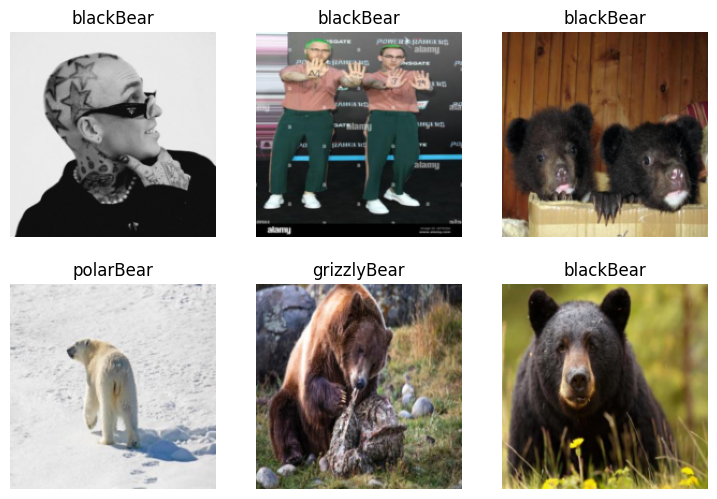

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

# Step 6: Train Model 

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.366550,0.427767,0.150538,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.390446,0.433475,0.150538,00:57
1,0.271084,0.490915,0.150538,00:57
2,0.199406,0.472340,0.139785,00:59


# Step 7: Make Predictions

In [25]:
get_image_files('type_of_bear/grizzlyBear')[:5]

(#5) [Path('type_of_bear/grizzlyBear/7a2be597-f1f5-4afa-b502-4f583d6d8ac4.jpg'),Path('type_of_bear/grizzlyBear/df0a5833-0e2d-40a7-8a1a-56af9431e4cb.jpg'),Path('type_of_bear/grizzlyBear/250ad520-0e2d-4b6f-a032-22adb7d1e44c.jpg'),Path('type_of_bear/grizzlyBear/af014863-da38-4398-b2ed-4e07f50d1841.jpg'),Path('type_of_bear/grizzlyBear/9dfc9819-28dd-4a93-8158-d5e5a0fc35dc.jpg')]

In [26]:
is_category,_,probs = learn.predict(PILImage.create('type_of_bear/grizzlyBear/7a2be597-f1f5-4afa-b502-4f583d6d8ac4.jpg'))
print(f"This is a: {is_category}.")
print(f"Probability: {probs.max():.4f}")

This is a: grizzlyBear.
Probability: 1.0000


In [27]:
get_image_files('type_of_bear/polarBear')[:3]

(#3) [Path('type_of_bear/polarBear/a7681325-78c4-4a79-b07a-21c2783811f6.jpg'),Path('type_of_bear/polarBear/158a18d3-6804-4b66-b663-89d9e3006d52.jpg'),Path('type_of_bear/polarBear/16e64590-61a5-4e43-8a72-43d362b36746.jpg')]

In [29]:
# Test polar bear
is_category,_,probs = learn.predict(PILImage.create('type_of_bear/polarBear/a7681325-78c4-4a79-b07a-21c2783811f6.jpg'))
print(f"Polar bear test - Predicted: {is_category}, Confidence: {probs.max():.4f}")

Polar bear test - Predicted: polarBear, Confidence: 0.9987
